# Environment Check

In [2]:
import numpy as np
import torch

In [3]:
DataSetPath='/edahome/msedalab/deyuan/HPWL_Estimation/ALIGN-Parser/Dataset/Data/'
DataSetSize=373
LargeNetThreshold=10000

In [4]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
print(device)
print(torch.__version__)
!python --version
!nvcc --version
#!cat /usr/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda:1
1.11.0+cu102
Python 3.8.6
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


## Mean and Standard Deviation Calculation

In [5]:
from torch_geometric.data import HeteroData
import csv

available_design = [i for i in range(DataSetSize)]
data_list = []
device_features_list = []
net_features_list = []


prev_device_node_features = torch.Tensor()
prev_net_node_features = torch.Tensor()

for design_id in available_design:
    
    data = HeteroData()
    
    # Device Nodes
    path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_device_nodes.csv'
    with open(path, newline='') as csvfile:
        rows = csv.reader(csvfile, delimiter=',')
        headers = next(rows)
        device_node_features_data = np.asarray(list(rows), dtype=np.float32)
        device_node_features_data = np.delete(device_node_features_data, 0, 1) # delete the id column
        if (np.count_nonzero(device_node_features_data[:,0] == 0) != 0):
            print(design_id)
        
        device_node_features = torch.from_numpy(device_node_features_data)
        data['device'].x = device_node_features
        
    
    # Net Nodes
    path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_net_nodes.csv'
    with open(path, newline='') as csvfile:
        rows = csv.reader(csvfile, delimiter=',')
        headers = next(rows)
        net_node_features_data = np.asarray(list(rows), dtype=np.float32)
        net_node_features_data = np.delete(net_node_features_data, 0, 1) # delete the id column
        
        net_node_features = torch.from_numpy(net_node_features_data[:,:-1])
        ground_truth = torch.from_numpy(net_node_features_data[:,-1])
        data['net'].x = net_node_features
        data['net'].y = ground_truth
        
        
    # Gate to Net Edges Index
    path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_gate2net_edges.csv'   
    with open(path, newline='') as csvfile:
        rows = csv.reader(csvfile, delimiter=',')
        #next(rows)
        gate2net_edge_index_data = np.asarray(list(rows), dtype=np.float32)

        gate2net_edge_index_data = torch.from_numpy(gate2net_edge_index_data)
        gate2net_edge_index_data = gate2net_edge_index_data.to(torch.long)
        N = gate2net_edge_index_data.shape[0]
        if N == 0:
            data['device', 'gate2net', 'net'].edge_index = gate2net_edge_index_data
        else:
            data['device', 'gate2net', 'net'].edge_index = torch.transpose(gate2net_edge_index_data, 0, 1)
     
    
    path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_net2gate_edges.csv'   
    with open(path, newline='') as csvfile:
        rows = csv.reader(csvfile, delimiter=',')
        #next(rows)
        net2gate_edge_index_data = np.asarray(list(rows), dtype=np.float32)

        net2gate_edge_index_data = torch.from_numpy(net2gate_edge_index_data)
        net2gate_edge_index_data = net2gate_edge_index_data.to(torch.long)
        N = net2gate_edge_index_data.shape[0]
        if N == 0:
            data['net', 'net2gate', 'device'].edge_index = net2gate_edge_index_data
        else:
            data['net', 'net2gate', 'device'].edge_index = torch.transpose(net2gate_edge_index_data, 0, 1)
        
            
    # Source to Net Edge Index
    path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_source2net_edges.csv'   
    with open(path, newline='') as csvfile:
        rows = csv.reader(csvfile, delimiter=',')
        #next(rows)
        source2net_edge_index_data = np.asarray(list(rows), dtype=np.float32)

        source2net_edge_index_data = torch.from_numpy(source2net_edge_index_data)
        source2net_edge_index_data = source2net_edge_index_data.to(torch.long)
        N = source2net_edge_index_data.shape[0]
        if N == 0:
            data['device', 'source2net', 'net'].edge_index = source2net_edge_index_data
        else:
            data['device', 'source2net', 'net'].edge_index = torch.transpose(source2net_edge_index_data, 0, 1)
     
    
    path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_net2source_edges.csv'   
    with open(path, newline='') as csvfile:
        rows = csv.reader(csvfile, delimiter=',')
        #next(rows)
        net2source_edge_index_data = np.asarray(list(rows), dtype=np.float32)

        net2source_edge_index_data = torch.from_numpy(net2source_edge_index_data)
        net2source_edge_index_data = net2source_edge_index_data.to(torch.long)
        N = net2source_edge_index_data.shape[0]
        if N == 0:
            data['net', 'net2source', 'device'].edge_index = net2source_edge_index_data
        else:
            data['net', 'net2source', 'device'].edge_index = torch.transpose(net2source_edge_index_data, 0, 1)
        
        
    # Capacitor to Net Edge Index
    path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_cap2net_edges.csv'   
    with open(path, newline='') as csvfile:
        rows = csv.reader(csvfile, delimiter=',')
        #next(rows)
        cap2net_edge_index_data = np.asarray(list(rows), dtype=np.float32)

        cap2net_edge_index_data = torch.from_numpy(cap2net_edge_index_data)
        cap2net_edge_index_data = cap2net_edge_index_data.to(torch.long)
        N = cap2net_edge_index_data.shape[0]
        if N == 0:
            data['device', 'capres2net', 'net'].edge_index = cap2net_edge_index_data
        else:
            data['device', 'capres2net', 'net'].edge_index = torch.transpose(cap2net_edge_index_data, 0, 1)
     
    
    path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_net2cap_edges.csv'   
    with open(path, newline='') as csvfile:
        rows = csv.reader(csvfile, delimiter=',')
        #next(rows)
        net2cap_edge_index_data = np.asarray(list(rows), dtype=np.float32)

        net2cap_edge_index_data = torch.from_numpy(net2cap_edge_index_data)
        net2cap_edge_index_data = net2cap_edge_index_data.to(torch.long)
        N = net2cap_edge_index_data.shape[0]
        if N == 0:
            data['net', 'net2capres', 'device'].edge_index = net2cap_edge_index_data
        else:
            data['net', 'net2capres', 'device'].edge_index = torch.transpose(net2cap_edge_index_data, 0, 1)   
      
    
    # Resistor to Net Edge Index
    path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_res2net_edges.csv'   
    with open(path, newline='') as csvfile:
        rows = csv.reader(csvfile, delimiter=',')
        #next(rows)
        res2net_edge_index_data = np.asarray(list(rows), dtype=np.float32)

        res2net_edge_index_data = torch.from_numpy(res2net_edge_index_data)
        res2net_edge_index_data = res2net_edge_index_data.to(torch.long)
        N = res2net_edge_index_data.shape[0]
        if N != 0:
            res2net_edge_index_data = torch.transpose(res2net_edge_index_data, 0, 1)
            data['device', 'capres2net', 'net'].edge_index = \
                torch.cat((data['device', 'capres2net', 'net'].edge_index, res2net_edge_index_data), 1)
     
    
    path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_net2res_edges.csv'   
    with open(path, newline='') as csvfile:
        rows = csv.reader(csvfile, delimiter=',')
        #next(rows)
        net2res_edge_index_data = np.asarray(list(rows), dtype=np.float32)

        net2res_edge_index_data = torch.from_numpy(net2res_edge_index_data)
        net2res_edge_index_data = net2res_edge_index_data.to(torch.long)
        N = net2res_edge_index_data.shape[0]
        if N != 0:
            net2res_edge_index_data  = torch.transpose(net2res_edge_index_data, 0, 1)
            data['net', 'net2capres', 'device'].edge_index = \
                torch.cat((data['net', 'net2capres', 'device'].edge_index, net2res_edge_index_data), 1)
        
    
    # Net to Net Edge Index
    path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_net2net_edges.csv'   
    with open(path, newline='') as csvfile:
        rows = csv.reader(csvfile, delimiter=',')
        #next(rows)
        net2net_edge_index_data = np.asarray(list(rows), dtype=np.float32)

        net2net_edge_index_data = torch.from_numpy(net2net_edge_index_data)
        net2net_edge_index_data = net2net_edge_index_data.to(torch.long)
        N = net2net_edge_index_data.shape[0]
        if N == 0:
            data['net', 'net2net', 'net'].edge_index = net2net_edge_index_data
        else:
            data['net', 'net2net', 'net'].edge_index = torch.transpose(net2net_edge_index_data, 0, 1)
     

    # Remove the Repeated Data
    if(not torch.equal(device_node_features, prev_device_node_features)):
        data_list.append(data)
        device_features_list.append(device_node_features_data)
        net_features_list.append(net_node_features_data)
    prev_device_node_features = device_node_features


device_features_list = [x for xs in device_features_list for x in xs]
net_features_list = [x for xs in net_features_list for x in xs]
device_features_list = np.array(device_features_list)
net_features_list = np.array(net_features_list)


print("Device Node Features' Shape: " + str(device_features_list.shape))
device_features_mean = np.mean(device_features_list, axis=0)
device_features_std = np.std(device_features_list, axis=0)
print("Device Node Features' Mean: " + str(device_features_mean))
print("Device Node Features' Std: " + str(device_features_std))

print("Net Node Features' Shape: " + str(net_features_list.shape))
net_features_mean = np.mean(net_features_list, axis=0)
net_features_std = np.std(net_features_list, axis=0)
print("Net Node Features' Mean: " + str(net_features_mean))
print("Net Node Features' Std: " + str(net_features_std))

print("DataSet size:")
print(len(data_list))



Device Node Features' Shape: (4840, 5)
Device Node Features' Mean: [1.4687221e+08 1.3245618e+09 8.9800166e+03 6.6443965e+03 9.2293388e-01]
Device Node Features' Std: [4.6006429e+08 2.3239562e+09 9.8264346e+03 1.1724921e+04 1.2513181e+00]
Net Node Features' Shape: (4573, 6)
Net Node Features' Mean: [6.6652089e-01 1.0146512e-01 3.9930025e-01 3.5097311e+00 3.9738026e+01
 3.5140730e+04]
Net Node Features' Std: [9.4276470e-01 3.0193734e-01 4.8974955e-01 3.6381481e+00 3.0870703e+01
 4.6655129e+04]
DataSet size:
266


# DataSet Profiling

In [6]:
device_type = device_features_list[:,-1]
print("Total Device: " + str(len(device_type)))

NumMos   = np.count_nonzero(device_type == 0)
NumCap   = np.count_nonzero(device_type == 1)
NumRes   = np.count_nonzero(device_type == 2)
NumBlock = np.count_nonzero(device_type == 3)

print("NumMos: " + str(NumMos))
print("NumCap: " + str(NumCap))
print("NumRes: " + str(NumRes))
print("NumBlock: " + str(NumBlock))

Total Device: 4840
NumMos: 2891
NumCap: 530
NumRes: 320
NumBlock: 1099


In [7]:
N = 100
#wirelength = np.log(net_features_list[:,-1])
wirelength = net_features_list[:,-1]
wirelength = np.sort(wirelength[net_features_list[:,1] == 0])
num_wire = len(wirelength)
print("Num wire: " + str(num_wire))

L_max = wirelength[(num_wire-1) - int(0.01*num_wire)]
L_min = wirelength[0]
interval = (L_max - L_min) / N
print("L min:" + str(L_min))
print("L max:" + str(wirelength[-1]))
print("Interval: " + str(interval))

interval_list = []
label = np.zeros(num_wire)

for i in range(N+1):
    interval_min = L_min + (i*interval)
    interval_max = L_min + ((i+1)*interval)
        
    if (i == N):
        label = np.where((wirelength >= interval_min), i, label)
    else:
        label = np.where((wirelength >= interval_min) & (wirelength < interval_max), i, label)  

interval_num = np.zeros(N+1)
   
for i in range(N+1):
    label_mask = np.where(label == i, True, False)
    interval_num[i] = len(label[label_mask])

Num wire: 4109
L min:168.0
L max:532336.0
Interval: 2337.52


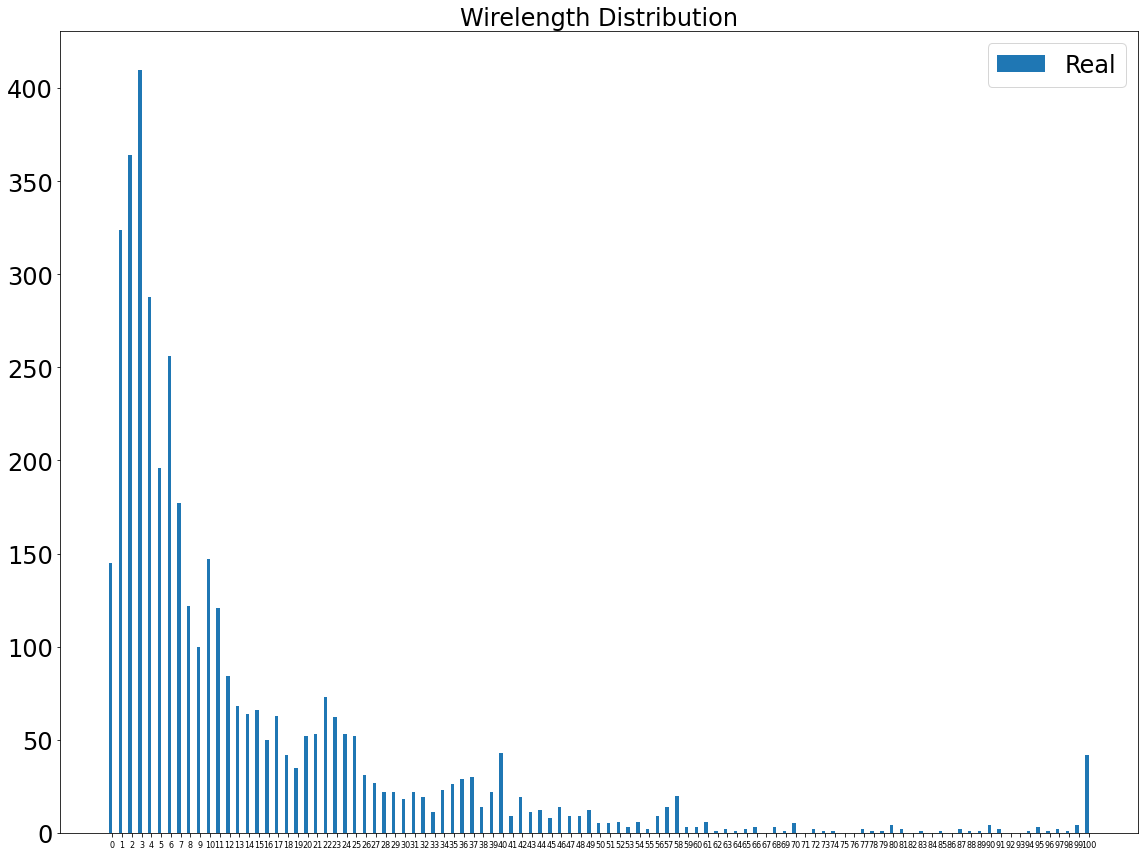

In [8]:
import matplotlib.pyplot as plt
labels = [i for i in range(N+1)]

x = np.arange(N+1)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, interval_num, width, label='Real')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('num', fontsize=24)
ax.set_title('Wirelength Distribution', fontsize=24)
plt.yticks(fontsize=24)
ax.set_xticks(x, labels, fontsize=8)
ax.legend(loc='best', fontsize=24)


fig.set_size_inches(16, 12)
fig.tight_layout()

plt.show()

In [9]:
N = 100

devicesize = device_features_list[:,0]
devicesize = np.sort(devicesize)
print(devicesize)
num_device = len(devicesize)
print("Num device: " + str(num_device))

L_max = devicesize[(num_device-1) - int(0.01*num_device)]
L_min = devicesize[0]
interval = (L_max - L_min) / N
print("L min:" + str(L_min))
print("L max:" + str(devicesize[-1]))
print("Interval: " + str(interval))

interval_list = []
label = np.zeros(num_device)

for i in range(N+1):
    interval_min = L_min + (i*interval)
    interval_max = L_min + ((i+1)*interval)
        
    if (i == N):
        label = np.where((devicesize >= interval_min), i, label)
    else:
        label = np.where((devicesize >= interval_min) & (devicesize < interval_max), i, label)  

interval_num = np.zeros(N+1)
   
for i in range(N+1):
    label_mask = np.where(label == i, True, False)
    interval_num[i] = len(label[label_mask])

[1.20960e+06 1.20960e+06 1.20960e+06 ... 3.04886e+09 3.04886e+09
 3.04886e+09]
Num device: 4840
L min:1209600.0
L max:3048860000.0
Interval: 20889803.52


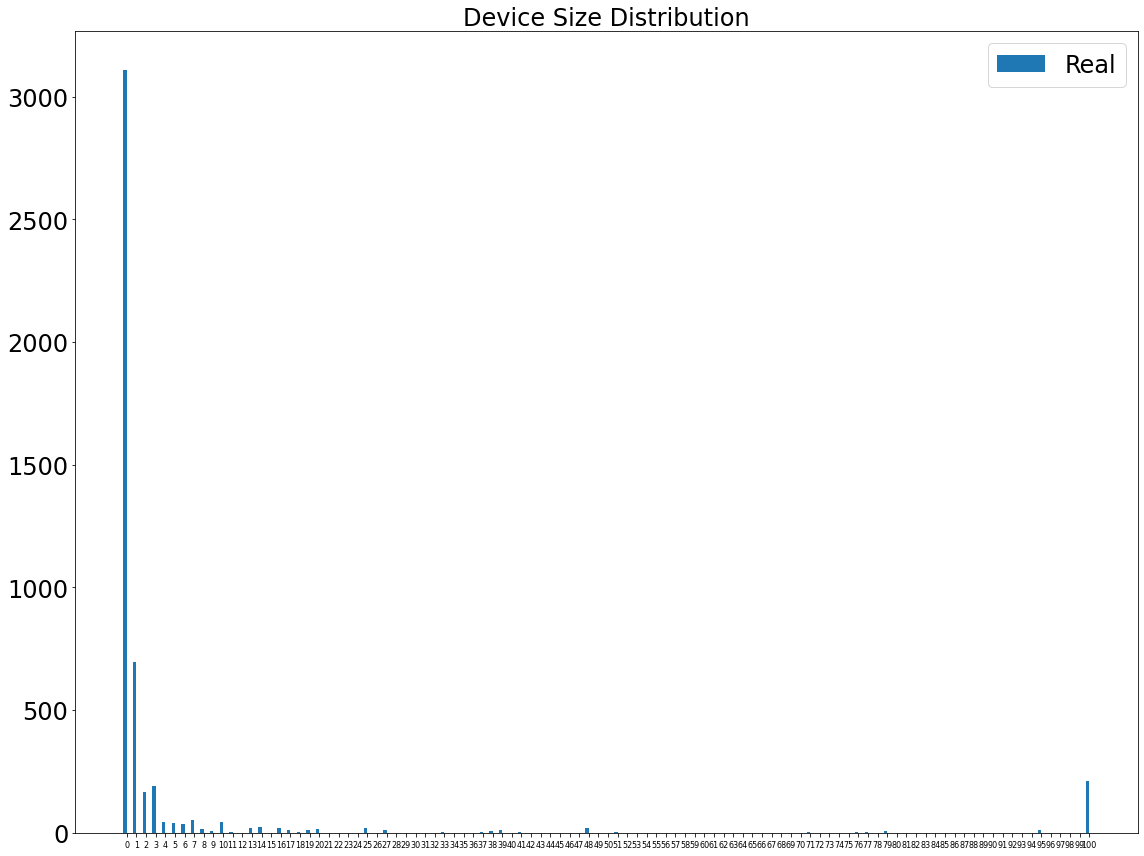

In [10]:
import matplotlib.pyplot as plt
labels = [i for i in range(N+1)]

x = np.arange(N+1)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, interval_num, width, label='Real')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('num', fontsize=24)
ax.set_title('Device Size Distribution', fontsize=24)
plt.yticks(fontsize=24)
ax.set_xticks(x, labels, fontsize=8)
ax.legend(loc='best', fontsize=24)


fig.set_size_inches(16, 12)
fig.tight_layout()

plt.show()

# DataSet Generation

In [11]:
from torch_geometric.data import InMemoryDataset, Dataset, Data
from torch_geometric.data import HeteroData
import torch_geometric.transforms as T
import random
import csv



class ALIGN(InMemoryDataset):
        
    def __init__(self, root, transform=None, pre_transform=None):
        super().__init__(root, transform, pre_transform)
        self.data, self.slices = torch.load(self.processed_paths[0])

        
    @property
    def raw_file_names(self):
        # List of the raw files
        
        available_design = [i for i in range(DataSetSize)]
        for design_id in available_design:
            file_1  = [DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_device_nodes.csv' for i in available_design]
            file_2  = [DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_net_nodes.csv' for i in available_design]
            file_3  = [DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_gate2net_edges.csv' for i in available_design]
            file_4  = [DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_source2net_edges.csv' for i in available_design]
            file_5  = [DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_capres2net_edges.csv' for i in available_design]
            file_6  = [DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_res2net_edges.csv' for i in available_design]
            file_7  = [DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_net2net_edges.csv' for i in available_design]
            file_8  = [DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_net2gate_edges.csv' for i in available_design]
            file_9  = [DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_net2source_edges.csv' for i in available_design]
            file_10 = [DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_net2cap_edges.csv' for i in available_design]
            file_11 = [DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_net2res_edges.csv' for i in available_design]
        
            return file_1 + file_2 + file_3 + file_4 + file_5 + file_6 + file_7 + file_8 + file_9 + file_10 + file_11
        
    @property
    def processed_file_names(self):
        """ return list of files should be in processed dir, if found - skip processing."""
        return ['ALIGN.pt']
    
    def download(self):
        pass
        
    def process(self):
        
        available_design = [i for i in range(DataSetSize)]
        data_list = []
   
        device_features_mean = np.array([1.4031939e+08, 1.2454504e+09, 8.8181260e+03, 6.4941816e+03, 2.4173553e-01], dtype=np.float32)
        device_features_std  = np.array([4.4081926e+08, 2.2398692e+09, 9.6391240e+03, 1.1522038e+04, 5.6172472e-01], dtype=np.float32)

        net_features_mean = np.array([6.6564620e-01, 1.0102777e-01, 3.9973760e-01, 3.5097311e+00, 3.9738026e+01], dtype=np.float32)
        net_features_std  = np.array([9.4245929e-01, 3.0135593e-01, 4.8984197e-01, 3.6381481e+00, 3.0870703e+01], dtype=np.float32)

        ground_truth_mean = np.array([3.5249398e+04], dtype=np.float32)
        ground_truth_std  = np.array([4.6795504e+04], dtype=np.float32)
        
        prev_device_node_features = torch.Tensor()
        prev_net_node_features = torch.Tensor()
        
        for design_id in available_design:
    
            data = HeteroData()
            
            # Device Nodes
            path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_device_nodes.csv'
            with open(path, newline='') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                headers = next(rows)
                device_node_features_data = np.asarray(list(rows), dtype=np.float32)
                device_node_features_data = np.delete(device_node_features_data, 0, 1)
                
                device_node_features_data = np.divide(np.subtract(device_node_features_data, device_features_mean), device_features_std)
                device_node_features = torch.from_numpy(device_node_features_data)
                data['device'].x = device_node_features
        
            # Net Nodes
            path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_net_nodes.csv'
            with open(path, newline='') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                headers = next(rows)
                net_node_features_data = np.asarray(list(rows), dtype=np.float32)
                net_node_features_data = np.delete(net_node_features_data, 0, 1)
                
                net_node_features = torch.from_numpy(net_node_features_data[:,:-1])
                ground_truth = torch.from_numpy(net_node_features_data[:,-1])
                #ground_truth = torch.from_numpy(np.exp(net_node_features_data[:,-1]))
                
                data['net'].y = ground_truth
                data['net'].train_mask = torch.where(net_node_features[:,1] == 0, True, False)
                data['net'].smallnet_mask = torch.logical_and(torch.where(ground_truth <= LargeNetThreshold, True, False), data['net'].train_mask)
                data['net'].largenet_mask = data['net'].train_mask
                
                net_node_features_data[:,:-1] = np.divide(np.subtract(net_node_features_data[:,:-1], net_features_mean), net_features_std)
                net_node_features = torch.from_numpy(net_node_features_data[:,:-1])
                data['net'].x = net_node_features
                
                
             
            # Gate to Net Edges Index
            path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_gate2net_edges.csv'   
            with open(path, newline='') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                #next(rows)
                gate2net_edge_index_data = np.asarray(list(rows), dtype=np.float32)

                gate2net_edge_index_data = torch.from_numpy(gate2net_edge_index_data)
                gate2net_edge_index_data = gate2net_edge_index_data.to(torch.long)
                N = gate2net_edge_index_data.shape[0]
                if N == 0:
                    data['device', 'gate2net', 'net'].edge_index = gate2net_edge_index_data
                else:
                    data['device', 'gate2net', 'net'].edge_index = torch.transpose(gate2net_edge_index_data, 0, 1)
     
    
            path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_net2gate_edges.csv'   
            with open(path, newline='') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                #next(rows)
                net2gate_edge_index_data = np.asarray(list(rows), dtype=np.float32)

                net2gate_edge_index_data = torch.from_numpy(net2gate_edge_index_data)
                net2gate_edge_index_data = net2gate_edge_index_data.to(torch.long)
                N = net2gate_edge_index_data.shape[0]
                if N == 0:
                    data['net', 'net2gate', 'device'].edge_index = net2gate_edge_index_data
                else:
                    data['net', 'net2gate', 'device'].edge_index = torch.transpose(net2gate_edge_index_data, 0, 1)
        
        
        
            # Source to Net Edge Index
            path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_source2net_edges.csv'   
            with open(path, newline='') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                #next(rows)
                source2net_edge_index_data = np.asarray(list(rows), dtype=np.float32)

                source2net_edge_index_data = torch.from_numpy(source2net_edge_index_data)
                source2net_edge_index_data = source2net_edge_index_data.to(torch.long)
                N = source2net_edge_index_data.shape[0]
                if N == 0:
                    data['device', 'source2net', 'net'].edge_index = source2net_edge_index_data
                else:
                    data['device', 'source2net', 'net'].edge_index = torch.transpose(source2net_edge_index_data, 0, 1)
     
    
            path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_net2source_edges.csv'   
            with open(path, newline='') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                #next(rows)
                net2source_edge_index_data = np.asarray(list(rows), dtype=np.float32)

                net2source_edge_index_data = torch.from_numpy(net2source_edge_index_data)
                net2source_edge_index_data = net2source_edge_index_data.to(torch.long)
                N = net2source_edge_index_data.shape[0]
                if N == 0:
                    data['net', 'net2source', 'device'].edge_index = net2source_edge_index_data
                else:
                    data['net', 'net2source', 'device'].edge_index = torch.transpose(net2source_edge_index_data, 0, 1)
        
        
            # Capacitor to Net Edge Index
            path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_cap2net_edges.csv'   
            with open(path, newline='') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                #next(rows)
                cap2net_edge_index_data = np.asarray(list(rows), dtype=np.float32)

                cap2net_edge_index_data = torch.from_numpy(cap2net_edge_index_data)
                cap2net_edge_index_data = cap2net_edge_index_data.to(torch.long)
                N = cap2net_edge_index_data.shape[0]
                if N == 0:
                    data['device', 'capres2net', 'net'].edge_index = cap2net_edge_index_data
                else:
                    data['device', 'capres2net', 'net'].edge_index = torch.transpose(cap2net_edge_index_data, 0, 1)
     
    
            path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_net2cap_edges.csv'   
            with open(path, newline='') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                #next(rows)
                net2cap_edge_index_data = np.asarray(list(rows), dtype=np.float32)

                net2cap_edge_index_data = torch.from_numpy(net2cap_edge_index_data)
                net2cap_edge_index_data = net2cap_edge_index_data.to(torch.long)
                N = net2cap_edge_index_data.shape[0]
                if N == 0:
                    data['net', 'net2capres', 'device'].edge_index = net2cap_edge_index_data
                else:
                    data['net', 'net2capres', 'device'].edge_index = torch.transpose(net2cap_edge_index_data, 0, 1)   
      
    
            # Resistor to Net Edge Index
            path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_res2net_edges.csv'   
            with open(path, newline='') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                #next(rows)
                res2net_edge_index_data = np.asarray(list(rows), dtype=np.float32)
    
                res2net_edge_index_data = torch.from_numpy(res2net_edge_index_data)
                res2net_edge_index_data = res2net_edge_index_data.to(torch.long)
                N = res2net_edge_index_data.shape[0]
                if N != 0:
                    res2net_edge_index_data = torch.transpose(res2net_edge_index_data, 0, 1)
                    data['device', 'capres2net', 'net'].edge_index = \
                        torch.cat((data['device', 'capres2net', 'net'].edge_index, res2net_edge_index_data), 1)
     
    
            path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_net2res_edges.csv'   
            with open(path, newline='') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                #next(rows)
                net2res_edge_index_data = np.asarray(list(rows), dtype=np.float32)
        
                net2res_edge_index_data = torch.from_numpy(net2res_edge_index_data)
                net2res_edge_index_data = net2res_edge_index_data.to(torch.long)
                N = net2res_edge_index_data.shape[0]
                if N != 0:
                    net2res_edge_index_data  = torch.transpose(net2res_edge_index_data, 0, 1)
                    data['net', 'net2capres', 'device'].edge_index = \
                        torch.cat((data['net', 'net2capres', 'device'].edge_index, net2res_edge_index_data), 1)      
            
            
            # Net to Net Edge Index
            path = DataSetPath + 'graph' + str(design_id) + '/graph' + str(design_id) + '_net2net_edges.csv'   
            with open(path, newline='') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                #next(rows)
                net2net_edge_index_data = np.asarray(list(rows), dtype=np.float32)

                net2net_edge_index_data = torch.from_numpy(net2net_edge_index_data)
                net2net_edge_index_data = net2net_edge_index_data.to(torch.long)
                N = net2net_edge_index_data.shape[0]
                if N == 0:
                    data['net', 'net2net', 'net'].edge_index = net2net_edge_index_data
                else:
                    data['net', 'net2net', 'net'].edge_index = torch.transpose(net2net_edge_index_data, 0, 1)

            if(not torch.equal(device_node_features, prev_device_node_features)):
                data_list.append(data)
            prev_device_node_features = device_node_features
        
              
        # Apply the functions specified in pre_filter and pre_transform
        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]
        
        #print(data_list)
        random.seed(0)
        random.shuffle(data_list)
        
        # Store the processed data
        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0]) 

In [12]:
dataset = ALIGN(root='data_CapRes')

Processing...
Done!


In [13]:
print(dataset)

ALIGN(266)
